# Fractal Dimension

This notebooks runs fractal dimension measures on time series signals. 

This notebook covers fractal dimension measures, including:
- Higuchi Fractal Dimension
- Petrosian Fractal Dimension
- Katz Fractal Dimension
- Sevcik Fractal Dimension

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from neurodsp.aperiodic.conversions import convert_exponent_hfd

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims
from apm.methods import higuchi_fd, petrosian_fd, katz_fd, sevcik_fd
from apm.plts.sims import plot_ap_sims, plot_pe_sims
from apm.sim.settings import SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

/Users/tom/Code/Projects/APMethods/AperiodicMethods/apm/methods/fit.py:16: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


## Settings

In [3]:
# Set the random seed
set_random_seed(111)

In [4]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FIGPATH = APMDB().figs_path / '15_complexity'

### Calculate Fractal Dimension on Example Signals

Calculate measures of fractal dimension on time series. 

In [5]:
# Check Higuchi fractal dimension measures on example signals
print('Higuchi fractal dimension:')
print('  powerlaw: \t {:1.4f} \t {:1.2f}'.format(higuchi_fd(SIG_AP), convert_exponent_hfd(EXP)))
print('  osc:      \t {:1.4f}'.format(higuchi_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(higuchi_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(higuchi_fd(SIG_KN)))

Higuchi fractal dimension:
  powerlaw: 	 1.6521 	 1.75
  osc:      	 1.0069
  combined: 	 1.6121
  knee:     	 1.5872


In [6]:
# Check Katz fractal dimension measures on example signals
print('Katz fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(katz_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(katz_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(katz_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(katz_fd(SIG_KN)))

Katz fractal dimension:
  powerlaw: 	 2.8171
  osc:      	 3.2026
  combined: 	 3.3193
  knee:     	 3.7614


In [7]:
# Check Petrosian fractal dimension measures on example signals
print('Petrosian fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(petrosian_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(petrosian_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(petrosian_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(petrosian_fd(SIG_KN)))

Petrosian fractal dimension:
  powerlaw: 	 1.0188
  osc:      	 1.0008
  combined: 	 1.0186
  knee:     	 1.0186


In [8]:
# Check Sevcik fractal dimension measures on example signals
print('Sevcik fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(sevcik_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(sevcik_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(sevcik_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(sevcik_fd(SIG_KN)))

Sevcik fractal dimension:
  powerlaw: 	 1.5830
  osc:      	 1.5814
  combined: 	 1.6089
  knee:     	 1.6570


### Fractal Dimension: Aperiodic Variations

In [9]:
# Run a set of simulations, calculating fractal dimension across exponents
hfd_sims_exp, hfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, higuchi_fd, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)
kfd_sims_exp, kfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, katz_fd, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)
pfd_sims_exp, pfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, petrosian_fd, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)
sfd_sims_exp, sfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, sevcik_fd, {},
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [10]:
# Run a set of simulations, calculating fractal dimension across exponents with an oscillation
hfd_sims_comb, hfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
kfd_sims_comb, kfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
pfd_sims_comb, pfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)
sfd_sims_comb, sfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sevcik_fd, {},
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


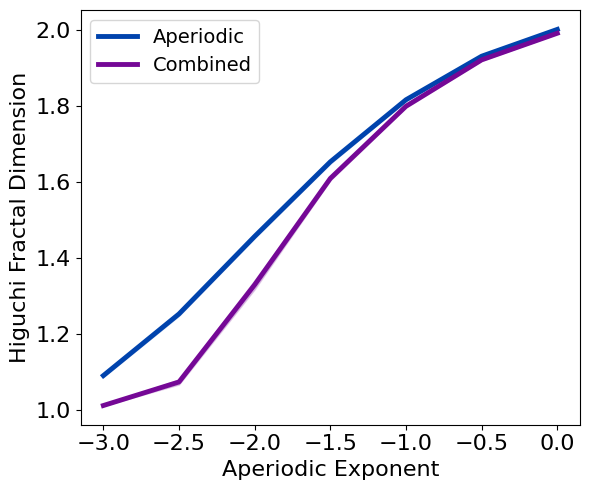

In [11]:
# Plot Higuchi fractal dimension estimates across aperiodic variations
plot_ap_sims(hfd_sims_exp, hfd_sims_exp_var, hfd_sims_comb, hfd_sims_comb_var,
             'Higuchi Fractal Dimension', save_fig=SAVE_FIG, file_name='hfd_ap' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


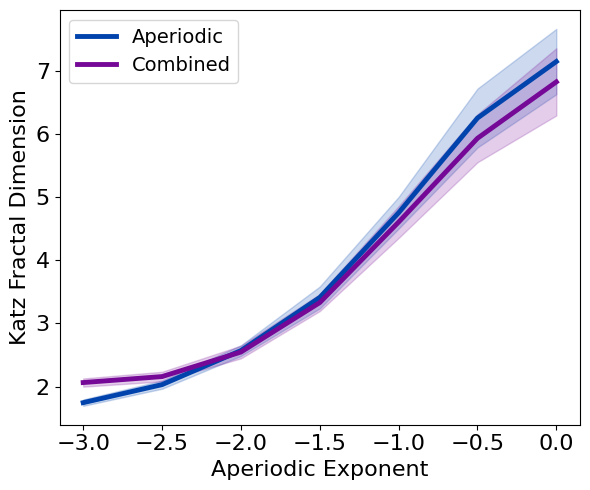

In [12]:
# Plot Katz fractal dimension estimates across aperiodic variations
plot_ap_sims(kfd_sims_exp, kfd_sims_exp_var, kfd_sims_comb, kfd_sims_comb_var,
             'Katz Fractal Dimension', save_fig=SAVE_FIG, file_name='kfd_ap' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


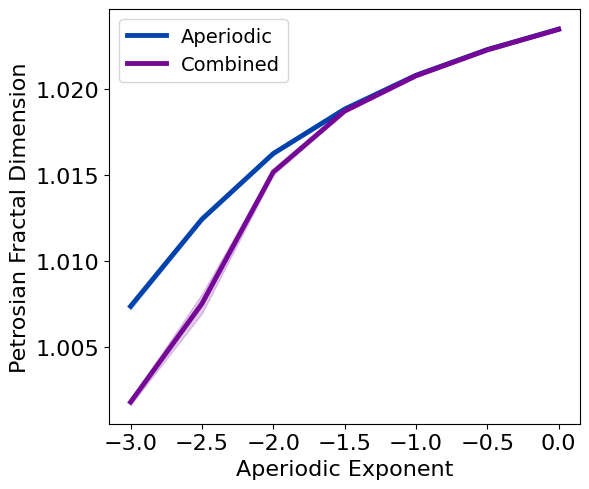

In [13]:
# Plot Petrosian fractal dimension estimates across aperiodic variations
plot_ap_sims(pfd_sims_exp, pfd_sims_exp_var, pfd_sims_comb, pfd_sims_comb_var,
             'Petrosian Fractal Dimension', save_fig=SAVE_FIG, file_name='pfd_ap' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


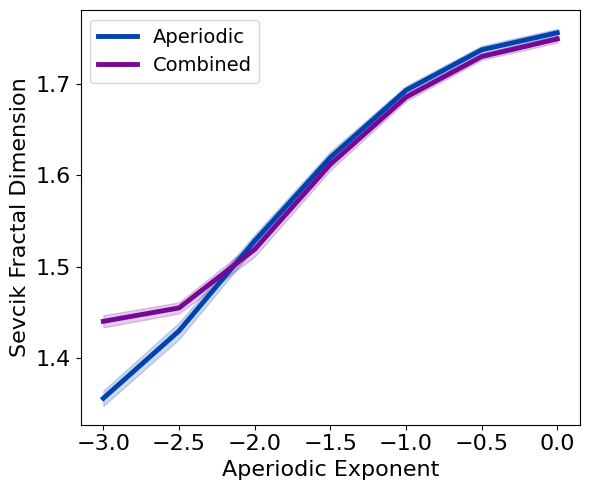

In [14]:
# Plot Sevcik fractal dimension estimates across aperiodic variations
plot_ap_sims(sfd_sims_exp, sfd_sims_exp_var, sfd_sims_comb, sfd_sims_comb_var,
             'Sevcik Fractal Dimension', save_fig=SAVE_FIG, file_name='sfd_ap' + EXT, file_path=FIGPATH)

### Fractal Dimension: Periodic Variations

In [15]:
# Run a set of simulations, calculating fractal dimension across oscillation frequency
hfd_sims_freq, hfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)
kfd_sims_freq, kfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)
pfd_sims_freq, pfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)
sfd_sims_freq, sfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sevcik_fd, {},
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [16]:
# Run a set of simulations, calculating fractal dimension across oscillation power
hfd_sims_pow, hfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)
kfd_sims_pow, kfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)
pfd_sims_pow, pfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)
sfd_sims_pow, sfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sevcik_fd, {},
    'update_pow', POWERS, N_SIMS, var_func=np.std)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


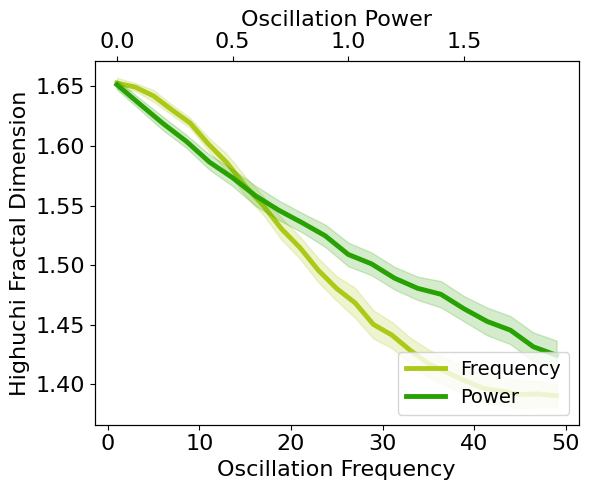

In [17]:
# Plot Higuchi fractal dimension estimates across periodic variations
plot_pe_sims(hfd_sims_freq, hfd_sims_freq_var, hfd_sims_pow, hfd_sims_pow_var,
             'Highuchi Fractal Dimension', save_fig=SAVE_FIG, file_name='hfd_pe' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


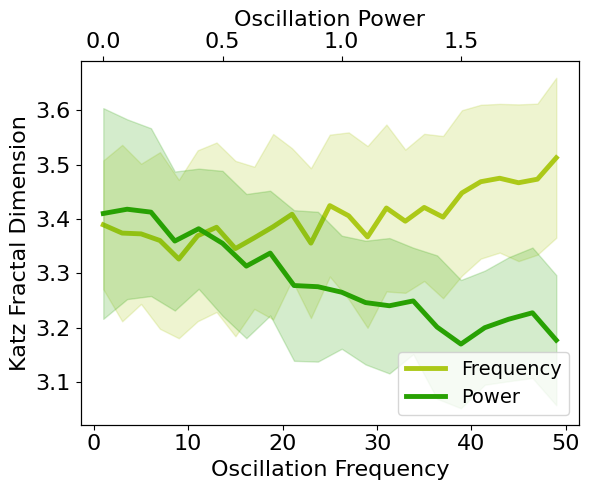

In [18]:
# Plot Katz fractal dimension estimates across periodic variations
plot_pe_sims(kfd_sims_freq, kfd_sims_freq_var, kfd_sims_pow, kfd_sims_pow_var,
             'Katz Fractal Dimension', save_fig=SAVE_FIG, file_name='kfd_pe' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


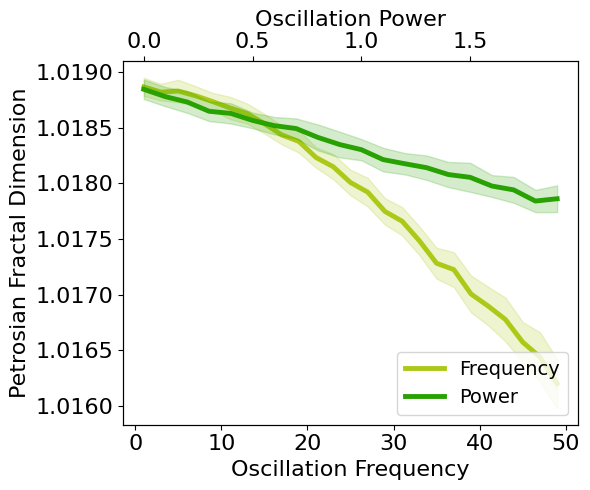

In [19]:
# Plot Petrosian fractal dimension estimates across periodic variations
plot_pe_sims(pfd_sims_freq, pfd_sims_freq_var, pfd_sims_pow, pfd_sims_pow_var,
             'Petrosian Fractal Dimension', save_fig=SAVE_FIG, file_name='pfd_pe' + EXT, file_path=FIGPATH)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:107: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


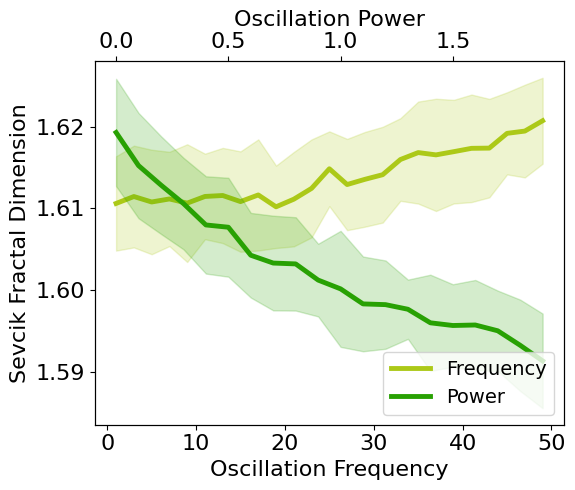

In [20]:
# Plot Sevcik fractal dimension estimates across periodic variations
plot_pe_sims(sfd_sims_freq, sfd_sims_freq_var, sfd_sims_pow, sfd_sims_pow_var,
             'Sevcik Fractal Dimension', save_fig=SAVE_FIG, file_name='sfd_pe' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Fractal dimension measures (general patterns, across all measures):
- increase with decreasing aperiodic exponent, non-linearly
- decreases with increasing oscillations frequency or power, mixed patterns